# Data Exploration Analysis

In [1]:
import imageio
import json
from pprint import pprint
import numpy as np
from scipy.misc import imread
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

## Load data

In [2]:
with open('../data/processed/train.json') as f:
    train_data = json.load(f)

In [3]:
len(train_data)

1604

In [4]:
class image_manipulation():
    def __init__(self, data):
        self.data = data
    
    # visual display of an 2D numpy array
    def show_image(image, cmap=None, title=None):
        fig = figure(figsize=(25, 25))
        vmax = 255
        plt.figure(figsize=(5, 5))
        plt.imshow(image, cmap=cmap, vmin=0, vmax=vmax)
        plt.axis('off')
        plt.show()
        
    def show_image_horizontally(self, list_image, list_title, cmap=None):
        list_len = len(list_image)
        fig = figure(figsize=(3*list_len, 3*list_len))
        n_image = len(list_image)
        for i in range(n_image):
            a=fig.add_subplot(1,n_image,i+1)
            plt.title(list_title[i], fontsize=14)
            image = list_image[i]
            imshow(image,cmap=cmap, vmin=0, vmax=255)
            axis('off')
        
    def show_example(self, index=0, cmap=None):
        scaler = MinMaxScaler(feature_range=(0, 255))
        example = self.data[index]
        id = example["id"]
        inc_angle = example["inc_angle"]
        is_iceberg = str(example["is_iceberg"])
        list_images = []
        list_image_titles = []
        for band in ["band_1", "band_2"]:
            example_band = np.array(example[band]).reshape(75,75)
            scaler.fit(example_band)
            example_image = scaler.transform(example_band)
            list_images.append(example_image)
            list_image_titles.append(band)

        mean_example_image =  sum(list_images)/2
        list_images.append(mean_example_image)
        list_image_titles.append("mean")
        self.show_image_horizontally(list_image=list_images, list_title=list_image_titles, cmap=cmap)
        print("Index: %s, example id: %s, incidence angle: %s, is iceberg: %s" % (index, id, inc_angle, is_iceberg))

## Visualize image - `band_1`, `band_2` and `mean`

Index: 256, example id: 527bc702, incidence angle: 41.9264, is iceberg: 0


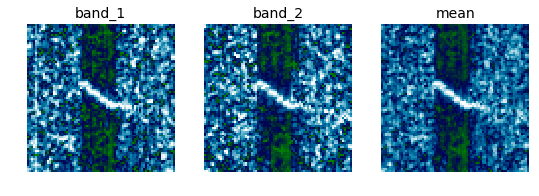

In [5]:
im = image_manipulation(data=train_data)
im.show_example(index=256, cmap="ocean") #index 1603 is max